<a href="https://colab.research.google.com/github/ChristianIshimwe7/Group1_formative2_textClassification/blob/main/Notebooks/Text_Classification_ML_Techniques_1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Core
import numpy as np
import pandas as pd
import re
import random

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# ML / DL
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
!pip install gensim
from gensim.models import Word2Vec

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 33.8 MB/s eta 0:00:00


In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/ChristianIshimwe7/Group1_formative2_textClassification/refs/heads/main/Data/train_df.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/ChristianIshimwe7/Group1_formative2_textClassification/refs/heads/main/Data/test_df.csv')
val_df = pd.read_csv('https://raw.githubusercontent.com/ChristianIshimwe7/Group1_formative2_textClassification/refs/heads/main/Data/val_df.csv')

TEXT_COL = 'text'
LABEL_COL = 'label'

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text, for_word2vec=True):
        if not isinstance(text, str):
            return "" if not for_word2vec else []

        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = text.split()
        tokens = [w for w in tokens if w not in self.stop_words and len(w) > 2]
        tokens = [self.lemmatizer.lemmatize(w) for w in tokens]

        return tokens if for_word2vec else ' '.join(tokens)

In [5]:
preprocessor = TextPreprocessor()

for df in [train_df, val_df, test_df]:
    df["cleaned_text_str"] = df[TEXT_COL].apply(
        lambda x: preprocessor.clean_text(x, for_word2vec=False)
    )
    df["cleaned_text_tokens"] = df[TEXT_COL].apply(
        lambda x: preprocessor.clean_text(x, for_word2vec=True)
    )

X_train_str = train_df["cleaned_text_str"]
X_val_str   = val_df["cleaned_text_str"]
X_test_str  = test_df["cleaned_text_str"]

X_train_tok = train_df["cleaned_text_tokens"]
X_val_tok   = val_df["cleaned_text_tokens"]
X_test_tok  = test_df["cleaned_text_tokens"]

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df[LABEL_COL])
y_val   = label_encoder.transform(val_df[LABEL_COL])
y_test  = label_encoder.transform(test_df[LABEL_COL])

NUM_CLASSES = len(label_encoder.classes_)

In [6]:
def plot_confusion(y_true, y_pred, classes, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(title)
    plt.show()


In [7]:
results = []

def log_result(embedding, experiment, params, y_true, y_pred):
    results.append({
        "Embedding": embedding,
        "Experiment": experiment,
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred, average="macro"),
        "Parameters": params
    })

#TF_IDF + LSTM

In [8]:
tfidf = TfidfVectorizer(max_features=300, ngram_range=(1,2))
X_train = tfidf.fit_transform(X_train_str).toarray()
X_val   = tfidf.transform(X_val_str).toarray()
X_test  = tfidf.transform(X_test_str).toarray()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val   = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 127s 128ms/step - accuracy: 0.3780 - loss: 1.0936 - val_accuracy: 0.3704 - val_loss: 1.0937
Epoch 2/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 108s 111ms/step - accuracy: 0.3731 - loss: 1.0935 - val_accuracy: 0.3710 - val_loss: 1.0933
Epoch 3/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 108s 111ms/step - accuracy: 0.3790 - loss: 1.0920 - val_accuracy: 0.3743 - val_loss: 1.0931
Epoch 4/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 142s 111ms/step - accuracy: 0.3769 - loss: 1.0927 - val_accuracy: 0.3718 - val_loss: 1.0927
Epoch 5/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 111s 114ms/step - accuracy: 0.3731 - loss: 1.0924 - val_accuracy: 0.3769 - val_loss: 1.0923
Epoch 6/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 108s 111ms/step - accuracy: 0.3773 - loss: 1.0922 - val_accuracy: 0.3720 - val_loss: 1.0928
Epoch 7/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 141s 111ms/step - accuracy: 0.3673 - loss: 1.0933 - val_accuracy: 0.3708 - val_loss: 1.0911
Epoch 8/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 145s 114ms/step - accuracy: 0.3717 -

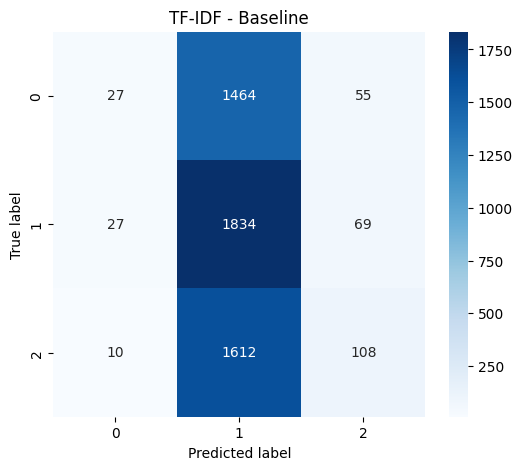

In [9]:
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(NUM_CLASSES, activation="softmax")
])

model.compile(optimizer=Adam(0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)

pred = model.predict(X_test).argmax(axis=1)

acc = accuracy_score(y_test, pred)
f1  = f1_score(y_test, pred, average="weighted")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

log_result("TF-IDF", "Baseline", {"LSTM_units":64}, y_test, pred)
plot_confusion(y_test, pred, classes=label_encoder.classes_, title="TF-IDF - Baseline")


#WORD2VEC + LSTM

In [10]:
MAX_LEN = 40
EMBED_DIM = 100

w2v = Word2Vec(sentences=X_train_tok, vector_size=EMBED_DIM, window=5, min_count=2)

def tokens_to_w2v(tokens):
    vecs = [w2v.wv[w] for w in tokens if w in w2v.wv]
    if not vecs:
        return np.zeros((MAX_LEN, EMBED_DIM))
    vecs = vecs[:MAX_LEN]
    return np.pad(vecs, ((0, MAX_LEN-len(vecs)), (0,0)))

X_train = np.array([tokens_to_w2v(t) for t in X_train_tok])
X_val   = np.array([tokens_to_w2v(t) for t in X_val_tok])
X_test  = np.array([tokens_to_w2v(t) for t in X_test_tok])


In [11]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)

weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weights = dict(zip(classes.tolist(), weights.tolist()))
print(class_weights)

{0: 1.1434010616877173, 1: 0.8936961684837039, 2: 0.9935738372462938}


In [12]:
print(y_train.shape)
print(y_train.dtype)
print(np.unique(y_train))


(31232,)
int64
[0 1 2]


In [13]:
y_train = y_train.astype("int32")
y_val   = y_val.astype("int32")
y_test  = y_test.astype("int32")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.4768 - loss: 1.0087 - val_accuracy: 0.5383 - val_loss: 0.9596
Epoch 2/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.5329 - loss: 0.9452 - val_accuracy: 0.5487 - val_loss: 0.9349
Epoch 3/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.5452 - loss: 0.9262 - val_accuracy: 0.5641 - val_loss: 0.9196
Epoch 4/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5586 - loss: 0.9070 - val_accuracy: 0.5677 - val_loss: 0.9085
Epoch 5/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.5734 - loss: 0.8868 - val_accuracy: 0.5604 - val_loss: 0.9107
Epoch 6/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.5789 - loss: 0.8827 - val_accuracy: 0.5775 - val_loss: 0.8877
Epoch 7/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.5853 - loss: 0.8745 - val_accuracy: 0.5700 - val_loss: 0.9137
Epoch 8/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.5915 - loss: 0.8648 - 

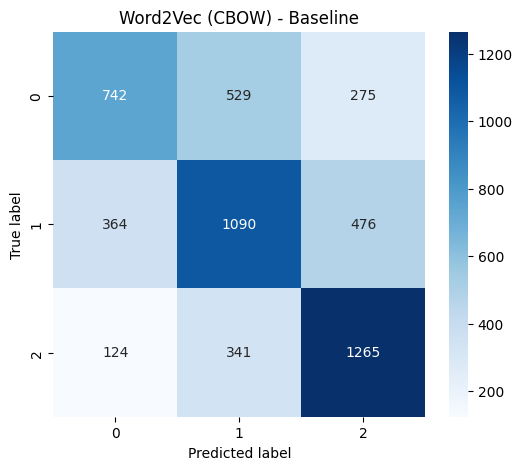

In [14]:
from tensorflow.keras.layers import Masking

model = Sequential([
    Masking(mask_value=0.0, input_shape=(MAX_LEN, EMBED_DIM)),
    LSTM(32, use_cudnn=False),
    Dense(NUM_CLASSES, activation="softmax")
])
model.compile(optimizer=Adam(0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, class_weight=class_weights)

pred = model.predict(X_test).argmax(axis=1)

acc = accuracy_score(y_test, pred)
f1  = f1_score(y_test, pred, average="weighted")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

log_result("Word2Vec - CBOW", "Baseline", {"LSTM_units":32}, y_test, pred)
plot_confusion(y_test, pred, classes=label_encoder.classes_, title="Word2Vec (CBOW) - Baseline")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 33s 31ms/step - accuracy: 0.4657 - loss: 1.0223 - val_accuracy: 0.5349 - val_loss: 0.9541
Epoch 2/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.5279 - loss: 0.9504 - val_accuracy: 0.5402 - val_loss: 0.9419
Epoch 3/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.5376 - loss: 0.9352 - val_accuracy: 0.5512 - val_loss: 0.9301
Epoch 4/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.5568 - loss: 0.9159 - val_accuracy: 0.5656 - val_loss: 0.9114
Epoch 5/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.5597 - loss: 0.9121 - val_accuracy: 0.5687 - val_loss: 0.9080
Epoch 6/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.5661 - loss: 0.9006 - val_accuracy: 0.5804 - val_loss: 0.8943
Epoch 7/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5731 - loss: 0.8883 - val_accuracy: 0.5664 - val_loss: 0.9013
Epoch 8/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.5777 - loss: 0.8895 - 

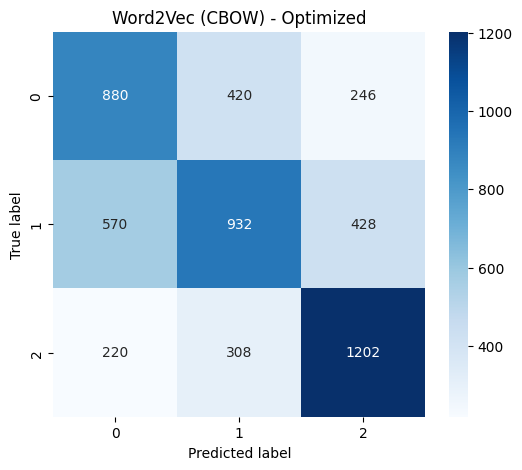

In [15]:
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model = Sequential([
    Masking(mask_value=0.0, input_shape=(MAX_LEN, EMBED_DIM)),
    LSTM(32, use_cudnn=False, dropout=0.2, recurrent_dropout=0.2),
    Dense(NUM_CLASSES, activation="softmax")
])
model.compile(optimizer=Adam(0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, class_weight=class_weights, callbacks=[es])

pred = model.predict(X_test).argmax(axis=1)

acc = accuracy_score(y_test, pred)
f1  = f1_score(y_test, pred, average="weighted")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

log_result("Word2Vec - CBOW", "Optimized", {"LSTM_units":[32]}, y_test, pred)
plot_confusion(y_test, pred, classes=label_encoder.classes_, title="Word2Vec (CBOW) - Optimized")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.4881 - loss: 1.0003 - val_accuracy: 0.5280 - val_loss: 0.9496
Epoch 2/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.5276 - loss: 0.9460 - val_accuracy: 0.5460 - val_loss: 0.9291
Epoch 3/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.5542 - loss: 0.9216 - val_accuracy: 0.5620 - val_loss: 0.9157
Epoch 4/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.5605 - loss: 0.9112 - val_accuracy: 0.5852 - val_loss: 0.8933
Epoch 5/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.5676 - loss: 0.8974 - val_accuracy: 0.5704 - val_loss: 0.9012
Epoch 6/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.5794 - loss: 0.8813 - val_accuracy: 0.5898 - val_loss: 0.8851
Epoch 7/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.5764 - loss: 0.8828 - val_accuracy: 0.5975 - val_loss: 0.8765
Epoch 8/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.5833 - loss: 0.8700 - 

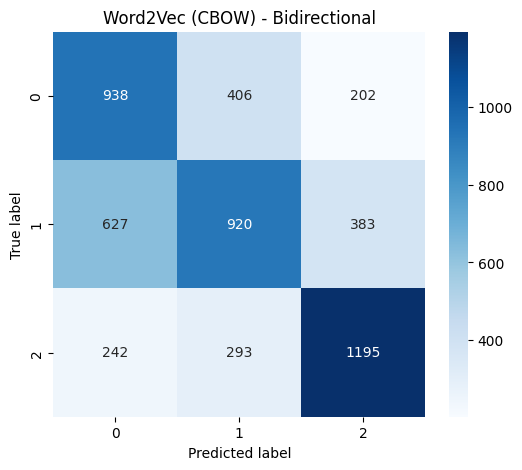

In [16]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Masking(mask_value=0.0, input_shape=(MAX_LEN, EMBED_DIM)),
    Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
    Dense(NUM_CLASSES, activation="softmax")
])

model.compile(optimizer=Adam(0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, class_weight=class_weights, callbacks=[es])

pred = model.predict(X_test).argmax(axis=1)

acc = accuracy_score(y_test, pred)
f1  = f1_score(y_test, pred, average="weighted")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

log_result("Word2Vec - CBOW", "Bidirectional", {"LSTM_units":32,"dropout":0.2}, y_test, pred)
plot_confusion(y_test, pred, classes=label_encoder.classes_, title="Word2Vec (CBOW) - Bidirectional")

#GLOVE + LSTM

In [17]:
yy!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2026-02-07 16:33:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2026-02-07 16:33:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2026-02-07 16:33:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [18]:
EMBED_DIM = 100
glove_path = "glove.6B.100d.txt"

embeddings_index = {}
with open(glove_path, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vec

print(f"Loaded {len(embeddings_index)} word vectors from GloVe.")

Loaded 400000 word vectors from GloVe.


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_tok)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, EMBED_DIM))
for word, i in word_index.items():
    vec = embeddings_index.get(word)
    if vec is not None:
        embedding_matrix[i] = vec

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 100
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_tok), maxlen=MAX_LEN)
X_val_seq   = pad_sequences(tokenizer.texts_to_sequences(X_val_tok), maxlen=MAX_LEN)
X_test_seq  = pad_sequences(tokenizer.texts_to_sequences(X_test_tok), maxlen=MAX_LEN)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


976/976 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.5560 - loss: 0.9308 - val_accuracy: 0.6298 - val_loss: 0.8260
Epoch 2/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.6565 - loss: 0.7756 - val_accuracy: 0.6563 - val_loss: 0.7820
Epoch 3/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.6822 - loss: 0.7328 - val_accuracy: 0.6644 - val_loss: 0.7660
Epoch 4/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.6919 - loss: 0.7126 - val_accuracy: 0.6655 - val_loss: 0.7613
Epoch 5/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.6978 - loss: 0.6976 - val_accuracy: 0.6715 - val_loss: 0.7545
Epoch 6/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.7068 - loss: 0.6733 - val_accuracy: 0.6745 - val_loss: 0.7554
Epoch 7/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.7202 - loss: 0.6511 - val_accuracy: 0.6647 - val_loss: 0.7805
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
Baseline Accuracy: 0.6688, F1-score: 0.6673


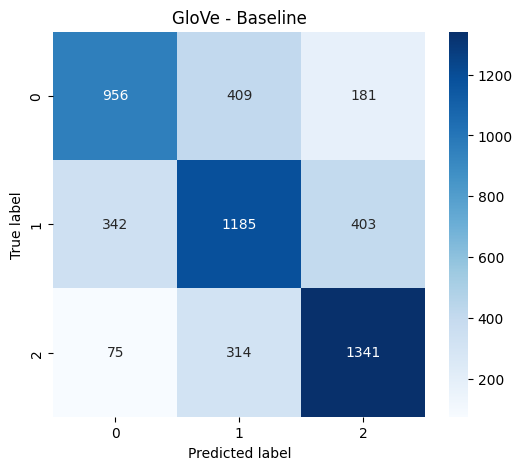

In [21]:
from tensorflow.keras.layers import Embedding
model = Sequential([
    Embedding(vocab_size, EMBED_DIM, weights=[embedding_matrix], input_length=MAX_LEN, trainable=False),
    LSTM(32),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_val),
          epochs=10, batch_size=32, class_weight=class_weights, callbacks=[es])

pred = model.predict(X_test_seq).argmax(axis=1)

acc = accuracy_score(y_test, pred)
f1  = f1_score(y_test, pred, average='weighted')
print(f"Baseline Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

log_result("GloVe", "Baseline", {"LSTM_units":32}, y_test, pred)
plot_confusion(y_test, pred, classes=label_encoder.classes_, title="GloVe - Baseline")


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


976/976 ━━━━━━━━━━━━━━━━━━━━ 71s 70ms/step - accuracy: 0.5110 - loss: 0.9784 - val_accuracy: 0.6313 - val_loss: 0.8292
Epoch 2/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - accuracy: 0.6342 - loss: 0.8168 - val_accuracy: 0.6578 - val_loss: 0.7852
Epoch 3/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 67s 69ms/step - accuracy: 0.6574 - loss: 0.7781 - val_accuracy: 0.6632 - val_loss: 0.7659
Epoch 4/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.6636 - loss: 0.7593 - val_accuracy: 0.6644 - val_loss: 0.7674
Epoch 5/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 65s 67ms/step - accuracy: 0.6707 - loss: 0.7448 - val_accuracy: 0.6686 - val_loss: 0.7531
Epoch 6/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 67s 68ms/step - accuracy: 0.6728 - loss: 0.7373 - val_accuracy: 0.6767 - val_loss: 0.7461
Epoch 7/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.6895 - loss: 0.7188 - val_accuracy: 0.6778 - val_loss: 0.7403
Epoch 8/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 65s 67ms/step - accuracy: 0.6881 - loss: 0.7167 - val_accurac

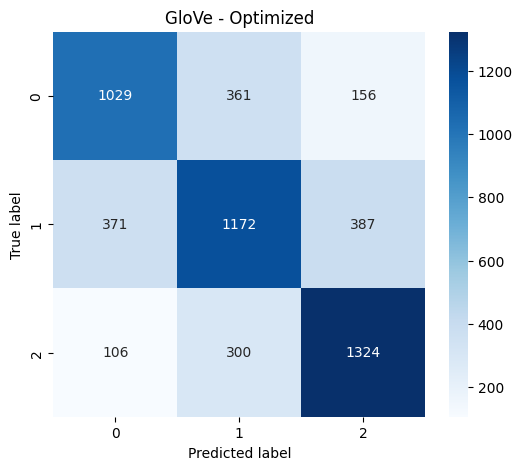

In [22]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Embedding(vocab_size, EMBED_DIM, weights=[embedding_matrix], input_length=MAX_LEN, trainable=False),
    LSTM(32, dropout=0.2, recurrent_dropout=0.2),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_val),
          epochs=10, batch_size=32, class_weight=class_weights, callbacks=[es])

pred = model.predict(X_test_seq).argmax(axis=1)

acc = accuracy_score(y_test, pred)
f1  = f1_score(y_test, pred, average='weighted')
print(f"Optimized Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

log_result("GloVe", "Optimized", {"LSTM_units":32, "dropout":0.2}, y_test, pred)
plot_confusion(y_test, pred, classes=label_encoder.classes_, title="GloVe - Optimized")

In [24]:
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by="F1", ascending=False)

results_df.reset_index(drop=True, inplace=True)

display(results_df[["Embedding", "Experiment", "Accuracy", "F1", "Parameters"]])


,Embedding,Experiment,Accuracy,F1,Parameters
0,GloVe,Optimized,0.677103,0.677796,"{'LSTM_units': 32, 'dropout': 0.2}"
1,GloVe,Baseline,0.668844,0.668772,{'LSTM_units': 32}
2,Word2Vec - CBOW,Baseline,0.594891,0.590127,{'LSTM_units': 32}
3,Word2Vec - CBOW,Bidirectional,0.586439,0.586289,"{'LSTM_units': 32, 'dropout': 0.2}"
4,Word2Vec - CBOW,Optimized,0.578947,0.577717,{'LSTM_units': [32]}
5,TF-IDF,Baseline,0.378217,0.226630,{'LSTM_units': 64}
